In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
customers = pd.read_csv('C:\\Users\\Administrator\\Data Science\\Customers.csv')
products = pd.read_csv('C:\\Users\\Administrator\\Data Science\\Products.csv')
transactions = pd.read_csv('C:\\Users\\Administrator\\Data Science\\Transactions.csv')


In [3]:
print("Customers Dataset:")
print(customers.head())
print("\nProducts Dataset:")
print(products.head())
print("\nTransactions Dataset:")
print(transactions.head())

# Check for missing values in each dataset
print("\nMissing Values in Customers Dataset:")
print(customers.isnull().sum())
print("\nMissing Values in Products Dataset:")
print(products.isnull().sum())
print("\nMissing Values in Transactions Dataset:")
print(transactions.isnull().sum())

# Check data types and provide a summary for numeric columns
print("\nCustomers Dataset Info:")
print(customers.info())
print("\nProducts Dataset Info:")
print(products.info())
print("\nTransactions Dataset Info:")
print(transactions.info())

print("\nSummary of Numeric Columns in Transactions Dataset:")
print(transactions.describe())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [4]:
# Handle missing or duplicate data (if any)

# Check for duplicates in each dataset
print("Duplicates in Customers Dataset:", customers.duplicated().sum())
print("Duplicates in Products Dataset:", products.duplicated().sum())
print("Duplicates in Transactions Dataset:", transactions.duplicated().sum())

# Remove duplicates if found (None in the provided output, but included for safety)
customers.drop_duplicates(inplace=True)
products.drop_duplicates(inplace=True)
transactions.drop_duplicates(inplace=True)

# Parse dates for 'SignupDate' and 'TransactionDate' columns
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Ensure consistent formatting across datasets
# Check for mismatched IDs in merged datasets
invalid_customer_ids = transactions[~transactions['CustomerID'].isin(customers['CustomerID'])]
invalid_product_ids = transactions[~transactions['ProductID'].isin(products['ProductID'])]

print("\nInvalid Customer IDs in Transactions:", len(invalid_customer_ids))
print("Invalid Product IDs in Transactions:", len(invalid_product_ids))

# If there are invalid IDs, drop those rows (none in the provided data, but included for safety)
transactions = transactions[transactions['CustomerID'].isin(customers['CustomerID'])]
transactions = transactions[transactions['ProductID'].isin(products['ProductID'])]

# Reset index for all cleaned datasets (optional)
customers.reset_index(drop=True, inplace=True)
products.reset_index(drop=True, inplace=True)
transactions.reset_index(drop=True, inplace=True)

# Final checks
print("\nCustomers Dataset after Cleaning:")
print(customers.info())
print("\nProducts Dataset after Cleaning:")
print(products.info())
print("\nTransactions Dataset after Cleaning:")
print(transactions.info())


Duplicates in Customers Dataset: 0
Duplicates in Products Dataset: 0
Duplicates in Transactions Dataset: 0

Invalid Customer IDs in Transactions: 0
Invalid Product IDs in Transactions: 0

Customers Dataset after Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
None

Products Dataset after Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   

In [5]:
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


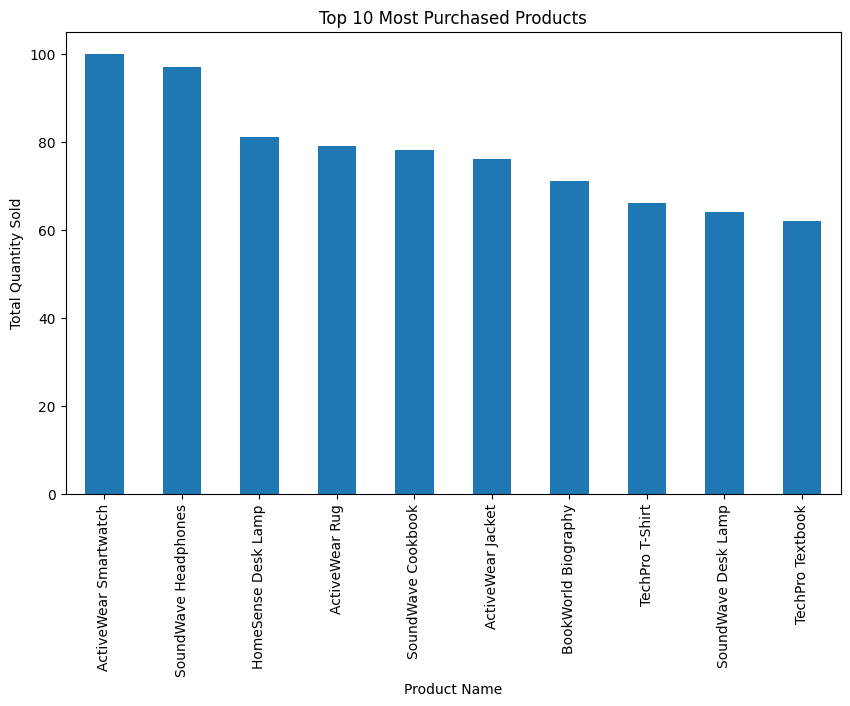

In [6]:
# Example: Top 10 most purchased products
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10, 6))
plt.title("Top 10 Most Purchased Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.show()


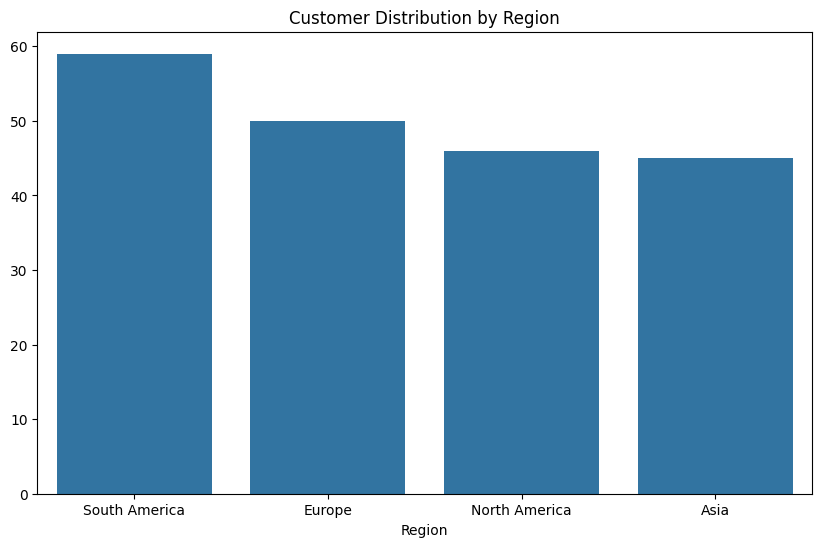

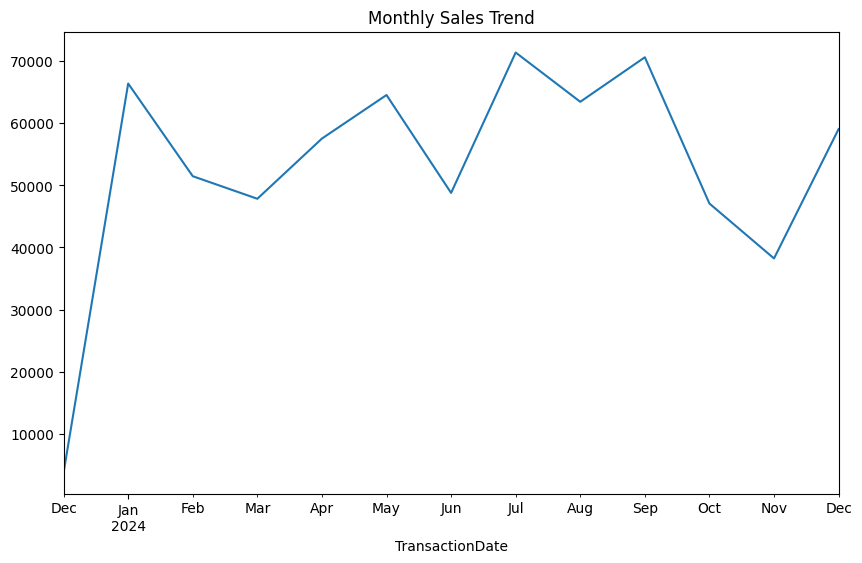

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('C:\\Users\\Administrator\\Data Science\\Customers.csv')
products = pd.read_csv('C:\\Users\\Administrator\\Data Science\\Products.csv')
transactions = pd.read_csv('C:\\Users\\Administrator\\Data Science\\Transactions.csv')

# Convert dates to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Merge datasets
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# 1. Customer Analysis
customer_region = customers['Region'].value_counts()
signup_trends = customers['SignupDate'].dt.year.value_counts()

# 2. Product Analysis
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(10)
category_sales = merged_data.groupby('Category')['TotalValue'].sum()

# 3. Transaction Analysis
monthly_sales = merged_data.resample('ME', on='TransactionDate')['TotalValue'].sum()
high_value_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

# Visualization examples
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_region.index, y=customer_region.values)
plt.title("Customer Distribution by Region")
plt.show()

plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()


In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [10]:
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

# 1. Summary Statistics
print("Customers Summary:")
print(customers.describe(include='all'))

print("\nProducts Summary:")
print(products.describe(include='all'))

print("\nTransactions Summary:")
print(transactions.describe(include='all'))

Customers Summary:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Products Summary:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4

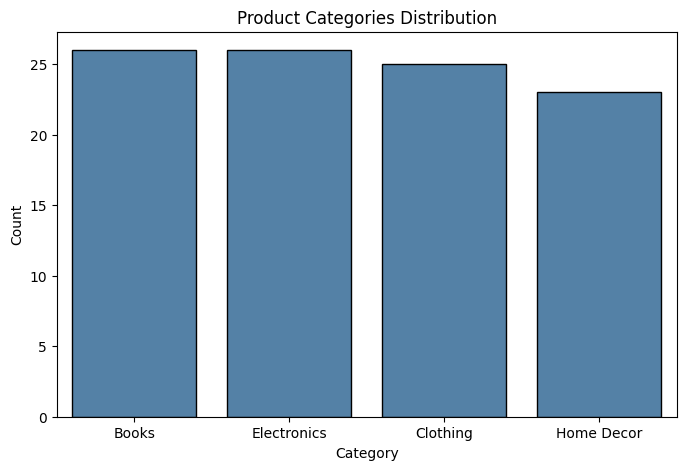

In [12]:
# Product Categories Distribution
plt.figure(figsize=(8, 5))
sns.barplot(
    x=product_categories.index,
    y=product_categories.values,
    edgecolor="black",
    color="steelblue"
)
plt.title("Product Categories Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


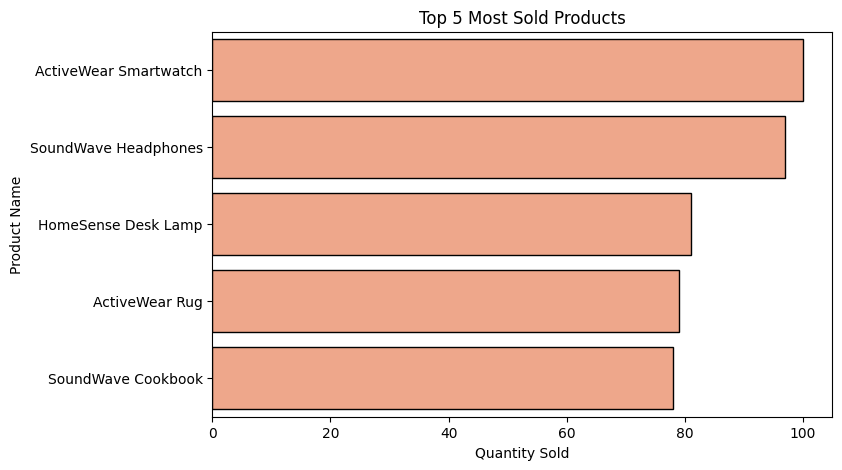

In [14]:
# Top 5 Most Sold Products
plt.figure(figsize=(8, 5))
sns.barplot(
    x=top_sold_products.values,
    y=top_sold_products.index,
    edgecolor="black",
    color="lightsalmon"
)
plt.title("Top 5 Most Sold Products")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.show()


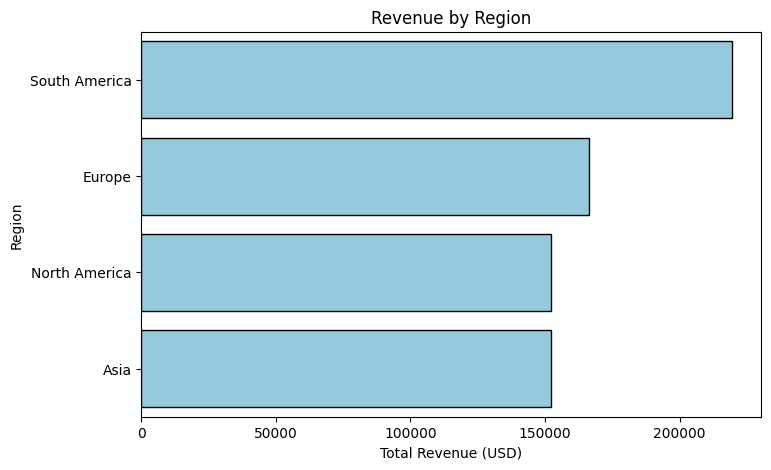

In [16]:
# Revenue by Region
plt.figure(figsize=(8, 5))
sns.barplot(
    x=region_revenue.values,
    y=region_revenue.index,
    edgecolor="black",
    color="skyblue"
)
plt.title("Revenue by Region")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Region")
plt.show()


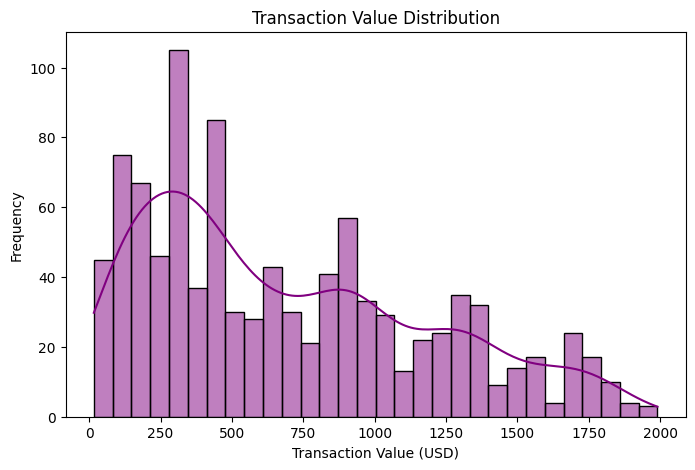

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color="purple")
plt.title("Transaction Value Distribution")
plt.xlabel("Transaction Value (USD)")
plt.ylabel("Frequency")
plt.show()

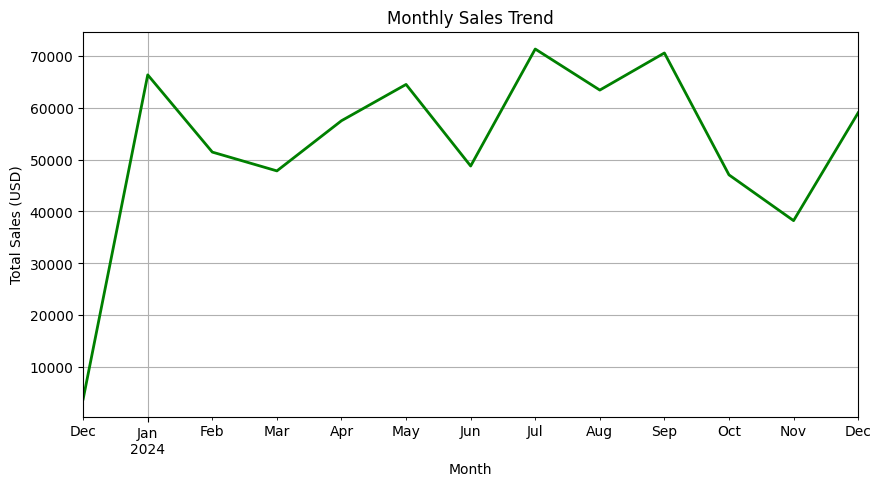

In [18]:
monthly_sales = merged_data.resample('MS', on='TransactionDate')['TotalValue'].sum()
plt.figure(figsize=(10, 5))
monthly_sales.plot(color="green", linewidth=2)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.grid(True)
plt.show()

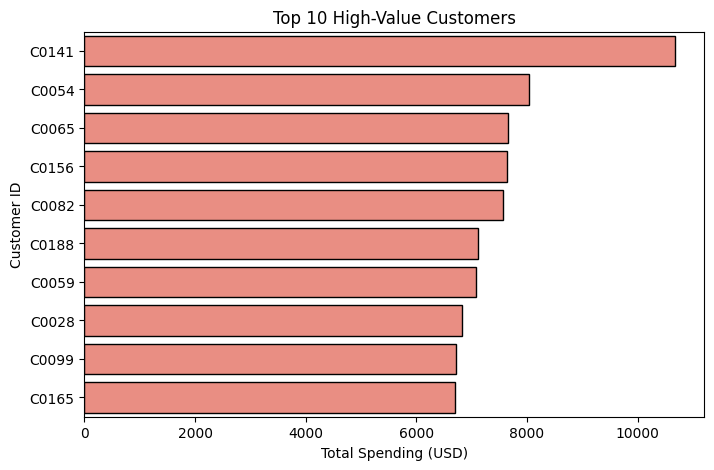

In [20]:
# High-Value Customers
plt.figure(figsize=(8, 5))
sns.barplot(
    x=high_value_customers.values,
    y=high_value_customers.index,
    edgecolor="black",
    color="salmon"
)
plt.title("Top 10 High-Value Customers")
plt.xlabel("Total Spending (USD)")
plt.ylabel("Customer ID")
plt.show()
